In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

# 데이터 불러오기

In [4]:
data = pd.read_csv("C:/Users/yejin/credit.csv")
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [5]:
#데이터 형태 확인 26457개의 행과 20개의 열로 이루어짐
data.shape

(26457, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


# 데이터 전처리

In [8]:
#데이터에서 결측치 있는부분을 확인
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [9]:
#결측치 많아서 삭제 결정
data = data.drop("occyp_type", axis = 1)

In [10]:
data.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [11]:
#데이터 길이 별 그룹화
unique_len = data.apply(lambda x : len(x.unique()))
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               3
dtype: int64

In [12]:
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [13]:
group_2 = unique_len[(2<unique_len)\
                     &(unique_len<=10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [14]:
group_3 = unique_len[unique_len >10].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [15]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,F,N,N,1,0,0,0
26453,F,N,Y,1,0,0,0
26454,F,Y,N,1,0,0,0
26455,M,N,Y,1,0,0,0


In [16]:
#F,M,N,Y각각 0,1로 변환
data['gender'] = data['gender'].replace(['F','M'], [0,  1])
data['car']=data['car'].replace(['N','Y'],[0,1])
data['reality']=data['reality'].replace(['N','Y'],[0,1])
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0
26453,0,0,1,1,0,0,0
26454,0,1,0,1,0,0,0
26455,1,0,1,1,0,0,0


In [17]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


<AxesSubplot:>

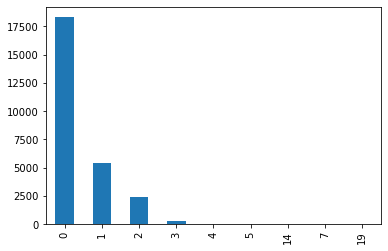

In [18]:
data["child_num"].value_counts().plot.bar()

<AxesSubplot:>

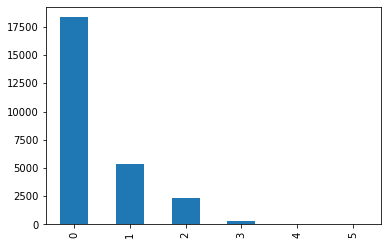

In [19]:
data.loc[data['child_num'] > 5, 'child_num'] = 5
data["child_num"].value_counts().plot.bar()

<AxesSubplot:>

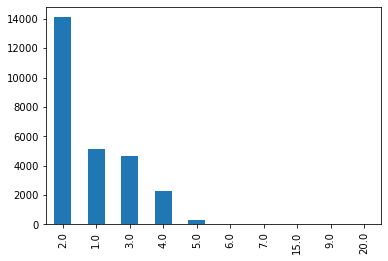

In [20]:
data["family_size"].value_counts().plot.bar()

<AxesSubplot:>

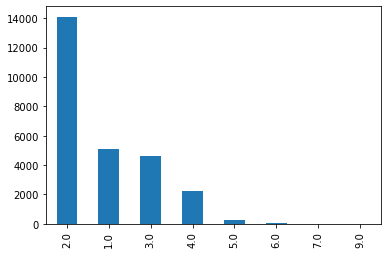

In [21]:
data.loc[data['family_size'] > 9, 'family_size'] = 9
data["family_size"].value_counts().plot.bar()

In [22]:
#float형 int형으로 변환
data['credit']=data['credit'].astype('int')

In [23]:
label_encoder = preprocessing.LabelEncoder()

In [24]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [25]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1
1,1,0,4,0,1,3.0,1
2,0,4,1,1,1,2.0,2
3,0,0,4,1,1,2.0,0
4,0,2,1,1,1,2.0,2
...,...,...,...,...,...,...,...
26452,2,2,4,1,1,4.0,1
26453,1,4,1,2,1,2.0,2
26454,0,4,4,0,5,2.0,2
26455,0,4,2,3,1,1.0,2


In [26]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [27]:
#float형 int형으로 변환
data['income_total']=data['income_total'].astype('int')

In [28]:
data['DAYS_BIRTH'] = round(abs(data['DAYS_BIRTH'])/30.0,0).astype(np.int32)
data['DAYS_EMPLOYED'] = round(abs(data['DAYS_EMPLOYED'])/30.0,0).astype(np.int32)
data['begin_month'] = round(abs(data['begin_month'])).astype(np.int32)

In [29]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500,463,157,6
1,1,247500,379,51,5
2,2,450000,636,148,22
3,3,202500,503,70,37
4,4,157500,501,70,26
...,...,...,...,...,...
26452,26452,225000,403,66,2
26453,26453,180000,510,82,47
26454,26454,292500,336,67,25
26455,26455,171000,338,4,59


In [30]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,202500,0,1,1,2,463,157,1,0,0,0,2.0,6,1
1,1,0,0,1,1,247500,0,4,0,1,379,51,1,0,0,1,3.0,5,1
2,2,1,1,1,0,450000,4,1,1,1,636,148,1,0,1,0,2.0,22,2
3,3,0,0,1,0,202500,0,4,1,1,503,70,1,0,1,0,2.0,37,0
4,4,0,1,1,0,157500,2,1,1,1,501,70,1,0,0,0,2.0,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000,2,4,1,1,403,66,1,0,0,0,4.0,2,1
26453,26453,0,0,1,1,180000,4,1,2,1,510,82,1,0,0,0,2.0,47,2
26454,26454,0,1,0,0,292500,4,4,0,5,336,67,1,0,0,0,2.0,25,2
26455,26455,1,0,1,0,171000,4,2,3,1,338,4,1,0,0,0,1.0,59,2


# RandomForest

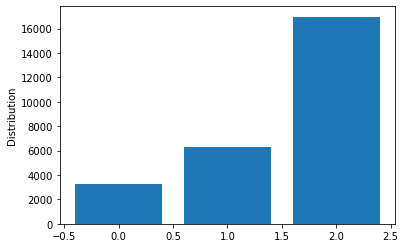

In [31]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# separate the target variable from the features
credit_target = data['credit']
credit_data = data.drop('credit', axis=1)

# plot the class distribution

#TODO: INSERT YOUR CODE HERE!
class_dict=credit_target.value_counts()
plt.bar(class_dict.index,class_dict)
plt.ylabel('Distribution')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn import neighbors, datasets  


credit_target = pd.DataFrame(data['credit'])
credit_data = pd.DataFrame(data.drop('credit', axis=1))
train_x, test_x, train_y, test_y = train_test_split(credit_data,credit_target,test_size=0.25,random_state=100)


In [33]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(19842, 18)
(6615, 18)
(19842, 1)
(6615, 1)


In [34]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
pred_rf = rf.predict(test_x)
pred_rf[:10]

<ipython-input-34-46943b9769ac>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [35]:
#randomforest 71%
print(accuracy_score(test_y,pred_rf))

0.7118669690098262


In [36]:
cm=pd.DataFrame(confusion_matrix(test_y, pred_rf))
cm

,0,1,2
0,107,140,546
1,44,631,904
2,82,190,3971


# KNN

In [37]:
numNeighbors = [1, 5, 10, 15, 25, 45, 65]
for k in numNeighbors:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(train_x,train_y.values.ravel())
    pred = clf.predict(test_x)
    print('n_neighbour=',k,pred[:10])
    print(accuracy_score(test_y,pred))
    cm_knn=pd.DataFrame(confusion_matrix(test_y, pred))
    cm_knn

n_neighbour= 1 [1 2 0 2 2 2 1 1 2 1]
0.4988662131519274
n_neighbour= 5 [2 2 0 2 2 2 2 1 2 2]
0.5362055933484505
n_neighbour= 10 [2 2 1 2 2 2 2 2 2 2]
0.6021164021164022
n_neighbour= 15 [2 2 1 2 2 2 2 2 2 2]
0.6211640211640211
n_neighbour= 25 [2 2 2 2 2 2 2 2 2 2]
0.636885865457294
n_neighbour= 45 [2 2 2 2 2 2 2 2 2 2]
0.6409674981103552
n_neighbour= 65 [2 2 2 2 2 2 2 2 2 2]
0.6414210128495843


Text(0, 0.5, 'Accuracy')

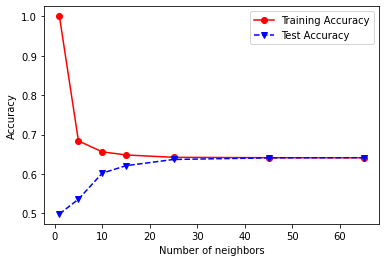

In [38]:
numNeighbors = [1, 5, 10, 15, 25, 45, 65]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(train_x,train_y.values.ravel())
    Y_predTrain = clf.predict(train_x)
    Y_predTest = clf.predict(test_x)
    trainAcc.append(accuracy_score(train_y, Y_predTrain))
    testAcc.append(accuracy_score(test_y, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

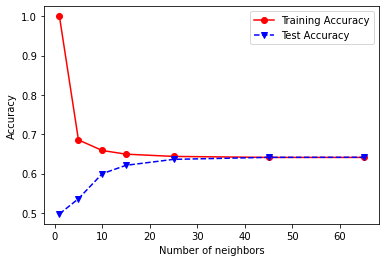

In [39]:
numNeighbors = [1, 5, 10, 15, 25, 45, 65]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    clf.fit(train_x,train_y.values.ravel())
    Y_predTrain = clf.predict(train_x)
    Y_predTest = clf.predict(test_x)
    trainAcc.append(accuracy_score(train_y, Y_predTrain))
    testAcc.append(accuracy_score(test_y, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [40]:
cm=pd.DataFrame(confusion_matrix(test_y, pred))
cm

,0,1,2
0,0,0,793
1,0,0,1579
2,0,0,4243


# Decision tree

In [41]:
depth = [1, 10,7]
for k in depth:
    dc= DecisionTreeClassifier(k) 
    dc.fit(train_x,train_y.values.ravel())
    pred_dc = dc.predict(test_x)
    pred_dc[:10]

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
#Decision tree 68%
print(accuracy_score(test_y,pred_dc))

In [51]:
cm=confusion_matrix(test_y, pred_dc)
cm

array([[  24,   99,  670],
       [  46,  378, 1155],
       [  41,   94, 4108]], dtype=int64)

In [68]:
dc= DecisionTreeClassifier(max_depth = 10) 
dc.fit(train_x,train_y.values.ravel())
pred_dc = dc.predict(test_x)
pred_dc[:10]

array([0, 2, 1, 2, 2, 0, 2, 2, 2, 2])

In [69]:
#Decision tree 68%
print(accuracy_score(test_y,pred_dc))

0.6816326530612244


In [70]:
cm=confusion_matrix(test_y, pred_dc)
cm

array([[  22,  101,  670],
       [  44,  376, 1159],
       [  36,   96, 4111]], dtype=int64)

In [71]:
dc= DecisionTreeClassifier(max_depth = 7) 
dc.fit(train_x,train_y.values.ravel())
pred_dc = dc.predict(test_x)
pred_dc[:10]

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [72]:
#Decision tree 69%
print(accuracy_score(test_y,pred_dc))

0.6855631141345427


In [73]:
cm=confusion_matrix(test_y, pred_dc)
cm

array([[   7,  105,  681],
       [  15,  379, 1185],
       [  11,   83, 4149]], dtype=int64)